# ML project 2 - Soccer Players Clustering
### About dataset:
- source: https://www.kaggle.com/datasets/spicemix/soccer-detailed-players-match-data?resource=download&select=players_away_matches.csv
- contains the detailed statistics per match for each players playing for the away team

### First steps:
- Split whole dataset into two parts: for modellers and for validators (70% and 30%)
- Split the first part into two parts: for training and for validation (70% and 30%)
- Split validation part from the first part into two parts: for validation and for testing (66% and 34%)
- Save all parts into separate files
- Remember to set the random seed for reproducibility

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

np.random.seed = 42

df=pd.read_csv('../data/players_away_matches.csv')

In [147]:
df.head()

,Unnamed: 0,awayScore,awayTeamName,awayTeamTacticalSchema,homeScore,homeTeamName,homeTeamTacticalSchema,matchDate,matchWeek,playerName,...,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg,team_name,championship_name
0,0,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Andrew Gravillon,...,3.0,1.0,37.0,8.0,57.0,27.0,0.0,0.0,Nice,ligue 1
1,1,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Ghislain Konan,...,19.0,0.0,21.0,2.0,47.0,28.0,0.0,0.0,Nice,ligue 1
2,2,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Kaj Sierhuis,...,8.0,2.0,4.0,1.0,19.0,7.0,0.1,0.0,Nice,ligue 1
3,3,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Marshall Munetsi,...,2.0,0.0,8.0,3.0,28.0,18.0,0.0,0.0,Nice,ligue 1
4,4,0,Reims,(3-4-1-2),0,Nice,(4-4-2),2021-08-08,1,Mathieu Cafaro,...,7.0,1.0,9.0,1.0,22.0,11.0,0.0,0.0,Nice,ligue 1


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76185 entries, 0 to 76184
Columns: 127 entries, Unnamed: 0 to championship_name
dtypes: float64(99), int64(20), object(8)
memory usage: 73.8+ MB


over 76k rows and 127 columns such as:
- awayScore (player's team's score in this match)
- homeScore (other team's score)
- homeTeamName (other team's name)
- home/awayTeamTacticalSchema (tactical schema of teams)
- matchWeek (no
- awayTeamName (player's team)
- matchDate 
- playerName
- championshipName
- age (of the player)
- assists (in this match)
- xg (expected goals)
- xa (expected assists)
- touches in different areas

### Business plan:
Leveraging clustering algorithms to analyze soccer match and player data to provide insights for teams, coaches, analysts, scouting agencies, and betting companies.

In [149]:
df.describe()

,Unnamed: 0,awayScore,homeScore,matchWeek,aerials_lost,aerials_won,aerials_won_pct,age,assisted_shots,assists,...,throw_ins,touches,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg
count,76185.000000,76185.000000,76185.000000,76185.000000,76106.000000,76106.000000,53425.000000,76184.000000,76106.000000,76185.000000,...,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000
mean,38092.000000,1.265997,1.553600,18.898720,1.144483,1.122040,47.487871,26.342040,0.561664,0.058922,...,1.398234,41.033874,9.722466,1.417063,14.182719,4.737879,37.739574,19.674296,0.055377,0.083088
std,21992.859466,1.174190,1.300618,10.766307,1.551606,1.632083,37.253259,4.190546,0.933877,0.249764,...,3.247539,24.469720,9.502356,1.985636,13.816960,8.485549,23.175180,15.643900,0.134103,0.196807
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19046.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,...,0.000000,22.000000,2.000000,0.000000,3.000000,0.000000,20.000000,7.000000,0.000000,0.000000
50%,38092.000000,1.000000,1.000000,19.000000,1.000000,1.000000,50.000000,26.000000,0.000000,0.000000,...,0.000000,40.000000,7.000000,1.000000,10.000000,2.000000,36.000000,17.000000,0.000000,0.000000
75%,57138.000000,2.000000,2.000000,28.000000,2.000000,2.000000,80.000000,29.000000,1.000000,0.000000,...,1.000000,57.000000,15.000000,2.000000,23.000000,5.000000,52.000000,29.000000,0.000000,0.100000
max,76184.000000,9.000000,9.000000,38.000000,19.000000,19.000000,100.000000,43.000000,9.000000,4.000000,...,29.000000,171.000000,88.000000,21.000000,98.000000,73.000000,168.000000,132.000000,2.300000,2.600000


In [113]:
# Split whole dataset into two parts: for modellers and for validators (70% and 30%)
X_mod, X_val = train_test_split(df, test_size=0.3, random_state=42)
print(X_mod.shape, X_val.shape)

(53329, 127) (22856, 127)


In [114]:
X_val.to_csv('../data/for_validators/soccer_players_whole_for_validators.csv', index=False)
X_mod.to_csv('../data/for_modellers/soccer_players_whole_for_modellers.csv', index=False)

In [115]:
X_train,X_valid = train_test_split(X_mod, test_size=0.3, random_state=42)
print(X_train.shape, X_valid.shape)

(37330, 127) (15999, 127)


In [116]:
X_validation,X_test = train_test_split(X_val, test_size=0.34, random_state=42)
print(X_validation.shape, X_test.shape)

(15084, 127) (7772, 127)


In [117]:
X_validation.to_csv('../data/for_validators/soccer_players_validation.csv', index=False)
X_test.to_csv('../data/for_validators/soccer_players_test.csv', index=False)
X_train.to_csv('../data/for_modellers/soccer_players_train.csv', index=False)
X_valid.to_csv('../data/for_modellers/soccer_players_valid.csv', index=False)

### Part 2:
- EDA


In [118]:
df.describe()

,Unnamed: 0,awayScore,homeScore,matchWeek,aerials_lost,aerials_won,aerials_won_pct,age,assisted_shots,assists,...,throw_ins,touches,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg
count,76185.000000,76185.000000,76185.000000,76185.000000,76106.000000,76106.000000,53425.000000,76184.000000,76106.000000,76185.000000,...,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000,76106.000000
mean,38092.000000,1.265997,1.553600,18.898720,1.144483,1.122040,47.487871,26.342040,0.561664,0.058922,...,1.398234,41.033874,9.722466,1.417063,14.182719,4.737879,37.739574,19.674296,0.055377,0.083088
std,21992.859466,1.174190,1.300618,10.766307,1.551606,1.632083,37.253259,4.190546,0.933877,0.249764,...,3.247539,24.469720,9.502356,1.985636,13.816960,8.485549,23.175180,15.643900,0.134103,0.196807
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19046.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,...,0.000000,22.000000,2.000000,0.000000,3.000000,0.000000,20.000000,7.000000,0.000000,0.000000
50%,38092.000000,1.000000,1.000000,19.000000,1.000000,1.000000,50.000000,26.000000,0.000000,0.000000,...,0.000000,40.000000,7.000000,1.000000,10.000000,2.000000,36.000000,17.000000,0.000000,0.000000
75%,57138.000000,2.000000,2.000000,28.000000,2.000000,2.000000,80.000000,29.000000,1.000000,0.000000,...,1.000000,57.000000,15.000000,2.000000,23.000000,5.000000,52.000000,29.000000,0.000000,0.100000
max,76184.000000,9.000000,9.000000,38.000000,19.000000,19.000000,100.000000,43.000000,9.000000,4.000000,...,29.000000,171.000000,88.000000,21.000000,98.000000,73.000000,168.000000,132.000000,2.300000,2.600000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76185 entries, 0 to 76184
Columns: 127 entries, Unnamed: 0 to championship_name
dtypes: float64(99), int64(20), object(8)
memory usage: 73.8+ MB


In [150]:
#how many categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns
print(f'categorical columns: {cat_cols}')
print(f'numerical columns: {num_cols}')
print(f'number of categorical columns: {len(cat_cols)}')
print(f'number of numerical columns: {len(num_cols)}')

categorical columns: Index(['awayTeamName', 'awayTeamTacticalSchema', 'homeTeamName',
       'homeTeamTacticalSchema', 'matchDate', 'playerName', 'team_name',
       'championship_name'],
      dtype='object')
numerical columns: Index(['Unnamed: 0', 'awayScore', 'homeScore', 'matchWeek', 'aerials_lost',
       'aerials_won', 'aerials_won_pct', 'age', 'assisted_shots', 'assists',
       ...
       'throw_ins', 'touches', 'touches_att_3rd', 'touches_att_pen_area',
       'touches_def_3rd', 'touches_def_pen_area', 'touches_live_ball',
       'touches_mid_3rd', 'xa', 'xg'],
      dtype='object', length=119)
number of categorical columns: 8
number of numerical columns: 119


Definitely a lot of data (127 columns, over 76k rows), but fortunately most of it numerical - we will have to think about encoding categorical columns. Let's check if our data contains nulls.

In [151]:
# Count null values in each column
null_counts = df.isnull().sum()

print("Null counts for each column:")
print(null_counts)

Null counts for each column:
Unnamed: 0                  0
awayScore                   0
awayTeamName                0
awayTeamTacticalSchema      0
homeScore                   0
                         ... 
touches_mid_3rd            79
xa                         79
xg                         79
team_name                   0
championship_name         657
Length: 127, dtype: int64


In [122]:
null_columns = df.columns[df.isnull().any()]

# Print the null columns
print("Null columns:")
print(null_columns)

Null columns:
Index(['aerials_lost', 'aerials_won', 'aerials_won_pct', 'age',
       'assisted_shots', 'ball_recoveries', 'blocked_passes', 'blocked_shots',
       'blocked_shots_saves', 'blocks', 'carries', 'carries_into_final_third',
       'carries_into_penalty_area', 'carry_distance',
       'carry_progressive_distance', 'clearances', 'corner_kicks',
       'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight',
       'crosses_into_penalty_area', 'dispossessed', 'dribble_tackles',
       'dribble_tackles_pct', 'dribbled_past', 'dribbles',
       'dribbles_completed', 'dribbles_completed_pct', 'dribbles_vs', 'errors',
       'gca', 'minutes', 'miscontrols', 'npxg', 'nutmegs', 'pass_targets',
       'passes', 'passes_blocked', 'passes_completed', 'passes_completed_long',
       'passes_completed_medium', 'passes_completed_short', 'passes_dead',
       'passes_free_kicks', 'passes_ground', 'passes_head', 'passes_high',
       'passes_intercepted', 'passes_into_final_third',
 

In [123]:
null_cols_count = df.isnull().any().sum()

print("Number of columns with null values:", null_cols_count)

Number of columns with null values: 100


There are a lot od columns with null values unfortunately.

Too many columns to observe anything, let's try to remove a few that seem unnecessary to us (like id).

In [7]:
#removing id and names
df = df.drop(df.columns[0], axis=1)
df.drop(columns=['playerName'], inplace=True)

As there is not much information on the page where the data frame is taken as to what the columns are, we have to guess a little bit about some of them

In [8]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns
num_df = df[num_cols]

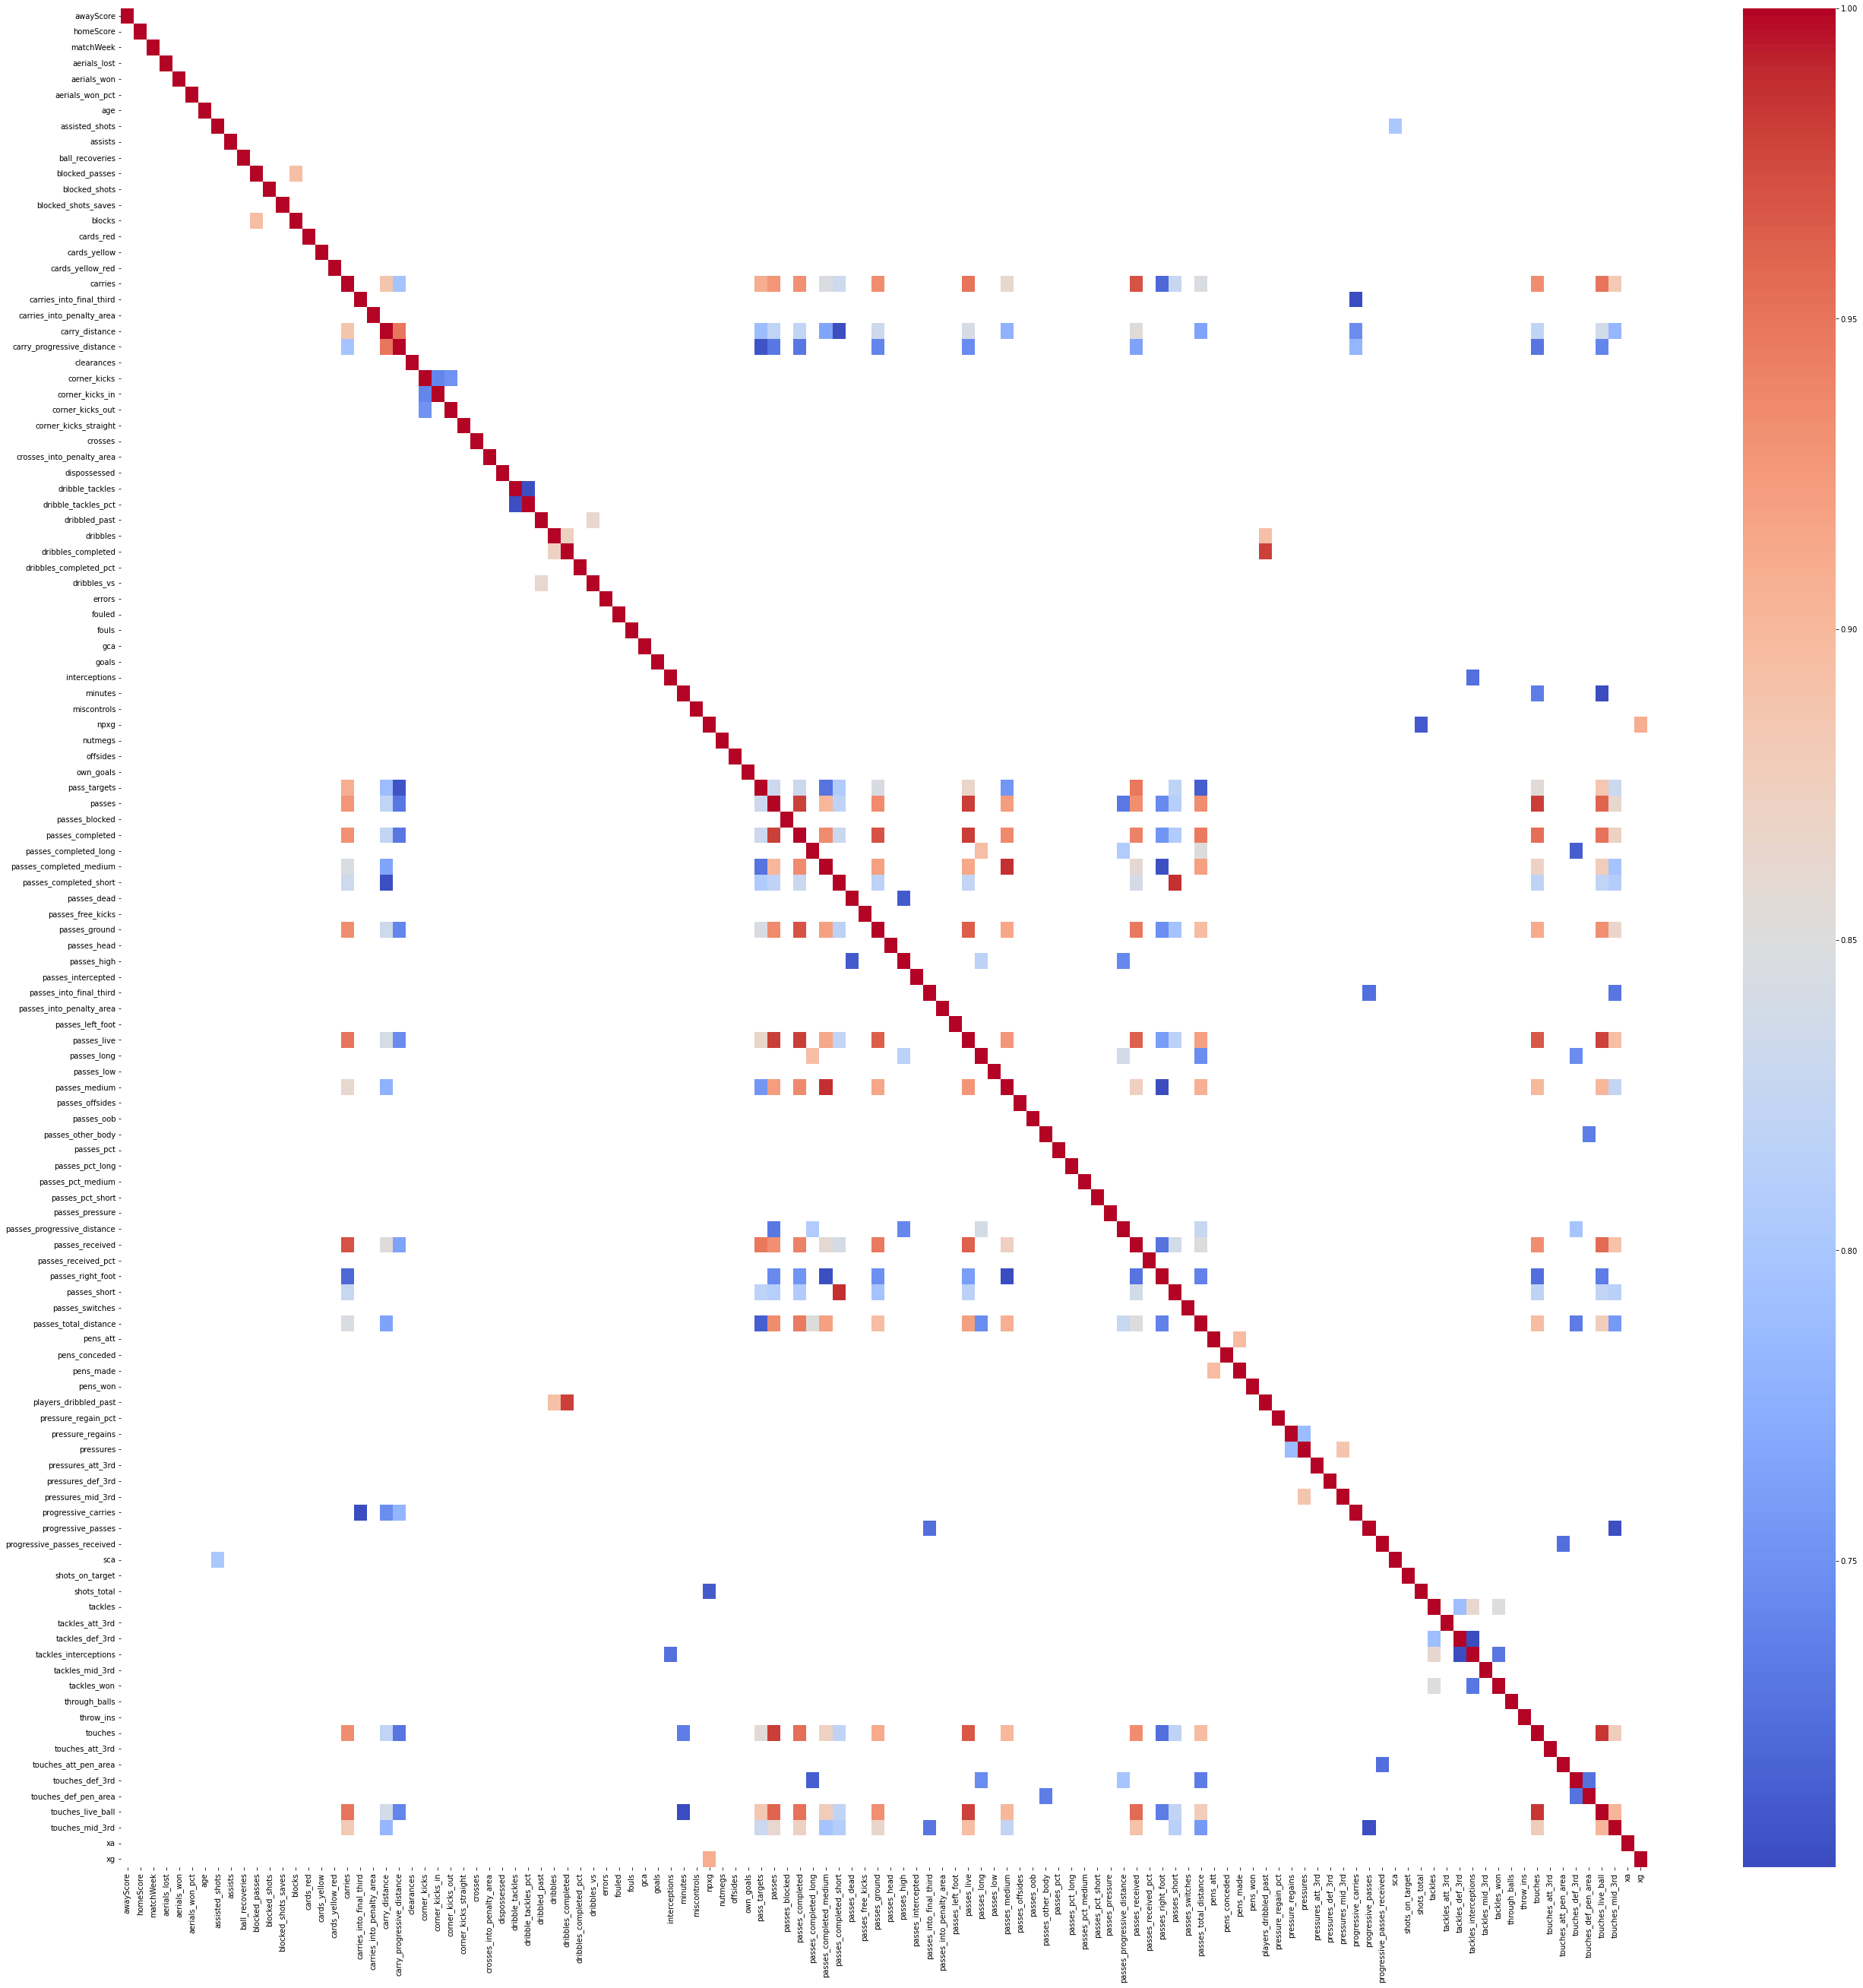

In [9]:
corr = num_df.corr()
high_correlation_matrix= corr[abs(corr)>0.7]
#plot
plt.figure(figsize=(45, 45))
sns.heatmap(high_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

Instead, let's list the names of the columns with the highest correlation, because you can't really see anything on the matrix

In [12]:
threshold = 0.7

# Filter for correlations greater than the threshold (excluding diagonals)
high_correlation_matrix = corr[(abs(corr) > threshold) & (corr != 1.0)]

# Print the highest correlations
for column in high_correlation_matrix.columns:
    highest_correlations = high_correlation_matrix[column].dropna()
    if not highest_correlations.empty:
        print(f"Highest correlations for column '{column}':")
        print(highest_correlations)
        print()

Highest correlations for column 'assisted_shots':
sca    0.802251
Name: assisted_shots, dtype: float64

Highest correlations for column 'blocked_passes':
blocks    0.894208
Name: blocked_passes, dtype: float64

Highest correlations for column 'blocks':
blocked_passes    0.894208
Name: blocks, dtype: float64

Highest correlations for column 'carries':
carry_distance                0.886719
carry_progressive_distance    0.796531
pass_targets                  0.909328
passes                        0.928545
passes_completed              0.931463
passes_completed_medium       0.845735
passes_completed_short        0.833390
passes_ground                 0.934181
passes_live                   0.950133
passes_medium                 0.861862
passes_received               0.970078
passes_right_foot             0.720386
passes_short                  0.827848
passes_total_distance         0.845946
touches                       0.933624
touches_live_ball             0.950055
touches_mid_3rd        

In [128]:
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > threshold:
            print(f"'{corr.columns[i]}' and '{corr.columns[j]}': {corr.iloc[i, j]}")

'assisted_shots' and 'sca': 0.8022514323878696
'blocked_passes' and 'blocks': 0.8942078696936235
'carries' and 'carry_distance': 0.8867194335111538
'carries' and 'carry_progressive_distance': 0.7965306118663779
'carries' and 'pass_targets': 0.9093279120924826
'carries' and 'passes': 0.9285452808666281
'carries' and 'passes_completed': 0.9314632309042608
'carries' and 'passes_completed_medium': 0.845735314553445
'carries' and 'passes_completed_short': 0.8333896818288152
'carries' and 'passes_ground': 0.934180736178898
'carries' and 'passes_live': 0.950133104858343
'carries' and 'passes_medium': 0.861862243888368
'carries' and 'passes_received': 0.9700775305003259
'carries' and 'passes_right_foot': 0.720385847186225
'carries' and 'passes_short': 0.827848251371485
'carries' and 'passes_total_distance': 0.8459458149296749
'carries' and 'touches': 0.933624211791785
'carries' and 'touches_live_ball': 0.9500553038450482
'carries' and 'touches_mid_3rd': 0.8811695374353823
'carries_into_final_t

We can try removing some of these columns in the next phase of the project: feature engineering. 

Let's encode categorial columns with feature hasher (do not seem to have a reasonable order, a lot of unique values in all of them (names of teams and competitions, tactics). Let's replace the date with the year and the month (the year may be relevant, the month as a season, for example, possibly also, but not the day, so we can delete it).

In [154]:
unique_values_count = df[cat_cols].nunique()
print(unique_values_count)

awayTeamName              129
awayTeamTacticalSchema     32
homeTeamName              122
homeTeamTacticalSchema     32
matchDate                 565
team_name                 122
championship_name           5
dtype: int64


Isn't awayTeamName and teamName the same, since it is a data frame for away players?

In [155]:
different_values = df[['team_name','awayTeamName','homeTeamName']]
print(different_values)

                  team_name     awayTeamName          homeTeamName
0                      Nice            Reims                  Nice
1                      Nice            Reims                  Nice
2                      Nice            Reims                  Nice
3                      Nice            Reims                  Nice
4                      Nice            Reims                  Nice
...                     ...              ...                   ...
76180  West Bromwich Albion   Crystal Palace  West Bromwich Albion
76181  West Bromwich Albion          Everton  West Bromwich Albion
76182  West Bromwich Albion  West Ham United  West Bromwich Albion
76183  West Bromwich Albion  West Ham United  West Bromwich Albion
76184  West Bromwich Albion          Chelsea  West Bromwich Albion

[76185 rows x 3 columns]


It appears not, but it seems that homeTeamName is the same as team_name

In [156]:
different_values = df[df['team_name'] != df['homeTeamName']]
print(different_values)

Empty DataFrame
Columns: [awayScore, awayTeamName, awayTeamTacticalSchema, homeScore, homeTeamName, homeTeamTacticalSchema, matchDate, matchWeek, aerials_lost, aerials_won, aerials_won_pct, age, assisted_shots, assists, ball_recoveries, blocked_passes, blocked_shots, blocked_shots_saves, blocks, cards_red, cards_yellow, cards_yellow_red, carries, carries_into_final_third, carries_into_penalty_area, carry_distance, carry_progressive_distance, clearances, corner_kicks, corner_kicks_in, corner_kicks_out, corner_kicks_straight, crosses, crosses_into_penalty_area, dispossessed, dribble_tackles, dribble_tackles_pct, dribbled_past, dribbles, dribbles_completed, dribbles_completed_pct, dribbles_vs, errors, fouled, fouls, gca, goals, interceptions, minutes, miscontrols, npxg, nutmegs, offsides, own_goals, pass_targets, passes, passes_blocked, passes_completed, passes_completed_long, passes_completed_medium, passes_completed_short, passes_dead, passes_free_kicks, passes_ground, passes_head, pass

yes, so let's remove one of these

In [157]:
df.drop(columns=['team_name'], inplace=True)

Let's check what exactly is championship_name 

In [158]:
unique_values_count = df['championship_name'].unique()
print(unique_values_count)

['ligue 1' 'premier league' 'bundesliga' 'seria a' 'liga' nan]


In [13]:
from sklearn.feature_extraction import FeatureHasher

# Convert date into year and month
df['matchYear'] = pd.to_datetime(df['matchDate']).dt.year
df['matchMonth'] = pd.to_datetime(df['matchDate']).dt.month

df.drop(columns=['matchDate'], inplace=True)


In [14]:
df

,awayScore,awayTeamName,awayTeamTacticalSchema,homeScore,homeTeamName,homeTeamTacticalSchema,matchWeek,aerials_lost,aerials_won,aerials_won_pct,...,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg,team_name,championship_name,matchYear,matchMonth
0,0,Reims,(3-4-1-2),0,Nice,(4-4-2),1,1.0,1.0,50.0,...,37.0,8.0,57.0,27.0,0.0,0.0,Nice,ligue 1,2021,8
1,0,Reims,(3-4-1-2),0,Nice,(4-4-2),1,1.0,0.0,0.0,...,21.0,2.0,47.0,28.0,0.0,0.0,Nice,ligue 1,2021,8
2,0,Reims,(3-4-1-2),0,Nice,(4-4-2),1,3.0,0.0,0.0,...,4.0,1.0,19.0,7.0,0.1,0.0,Nice,ligue 1,2021,8
3,0,Reims,(3-4-1-2),0,Nice,(4-4-2),1,1.0,2.0,66.7,...,8.0,3.0,28.0,18.0,0.0,0.0,Nice,ligue 1,2021,8
4,0,Reims,(3-4-1-2),0,Nice,(4-4-2),1,1.0,1.0,50.0,...,9.0,1.0,22.0,11.0,0.0,0.0,Nice,ligue 1,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76180,5,Crystal Palace,(4-4-2),1,West Bromwich Albion,(3-4-1-2),11,5.0,4.0,44.4,...,2.0,2.0,32.0,10.0,0.1,0.7,West Bromwich Albion,premier league,2020,12
76181,1,Everton,(3-4-1-2),0,West Bromwich Albion,(4-1-4-1),29,0.0,0.0,NaN,...,6.0,1.0,65.0,40.0,0.0,0.0,West Bromwich Albion,premier league,2021,3
76182,3,West Ham United,(4-2-3-1),1,West Bromwich Albion,(4-4-1-1),37,3.0,2.0,40.0,...,25.0,10.0,32.0,10.0,0.0,0.0,West Bromwich Albion,premier league,2021,5
76183,3,West Ham United,(4-2-3-1),1,West Bromwich Albion,(4-4-1-1),37,0.0,0.0,NaN,...,1.0,1.0,2.0,1.0,0.0,0.0,West Bromwich Albion,premier league,2021,5


In [175]:
# Feature hashing dla kolumn kategoriycznych
hasher = FeatureHasher(n_features=10, input_type='string')
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    col_values = df[col].astype(str).apply(lambda x: [x]).tolist()
    hashed_features = hasher.fit_transform(col_values)
    hashed_df = pd.DataFrame(hashed_features.toarray())
    df = pd.concat([df, hashed_df], axis=1)
df.drop(columns=cat_cols, inplace=True)

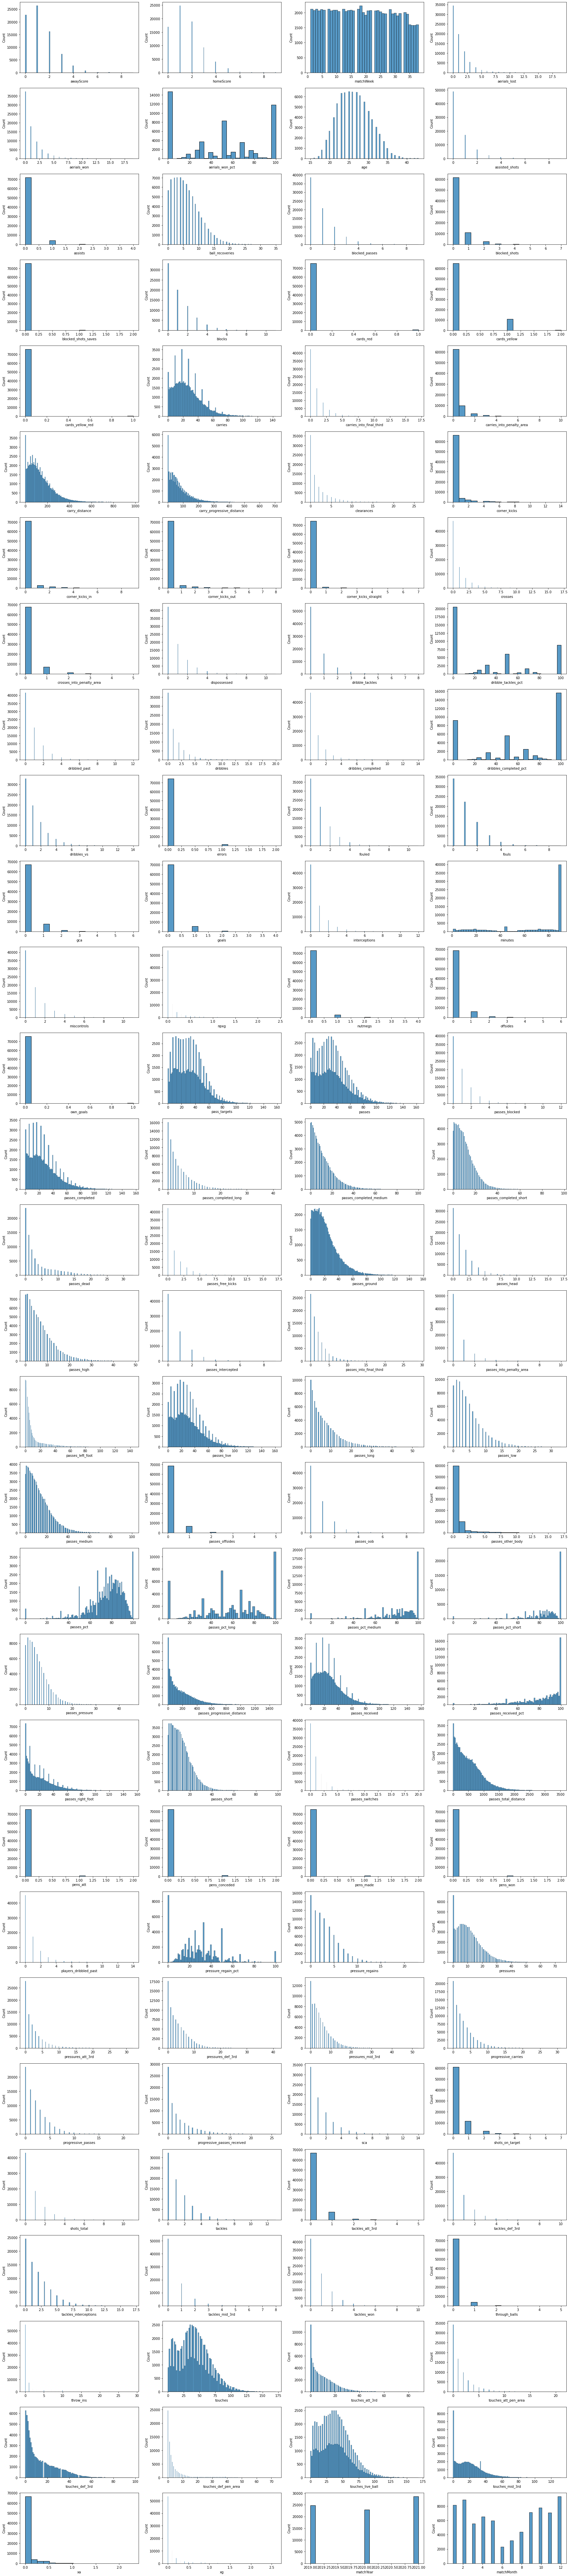

In [40]:
fig, axs = plt.subplots(30, 4, figsize = (24, 108))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    series = df[col][~df[col].isna()]
    sns.histplot(x = series, ax=axs[i])

plt.tight_layout()
plt.show()

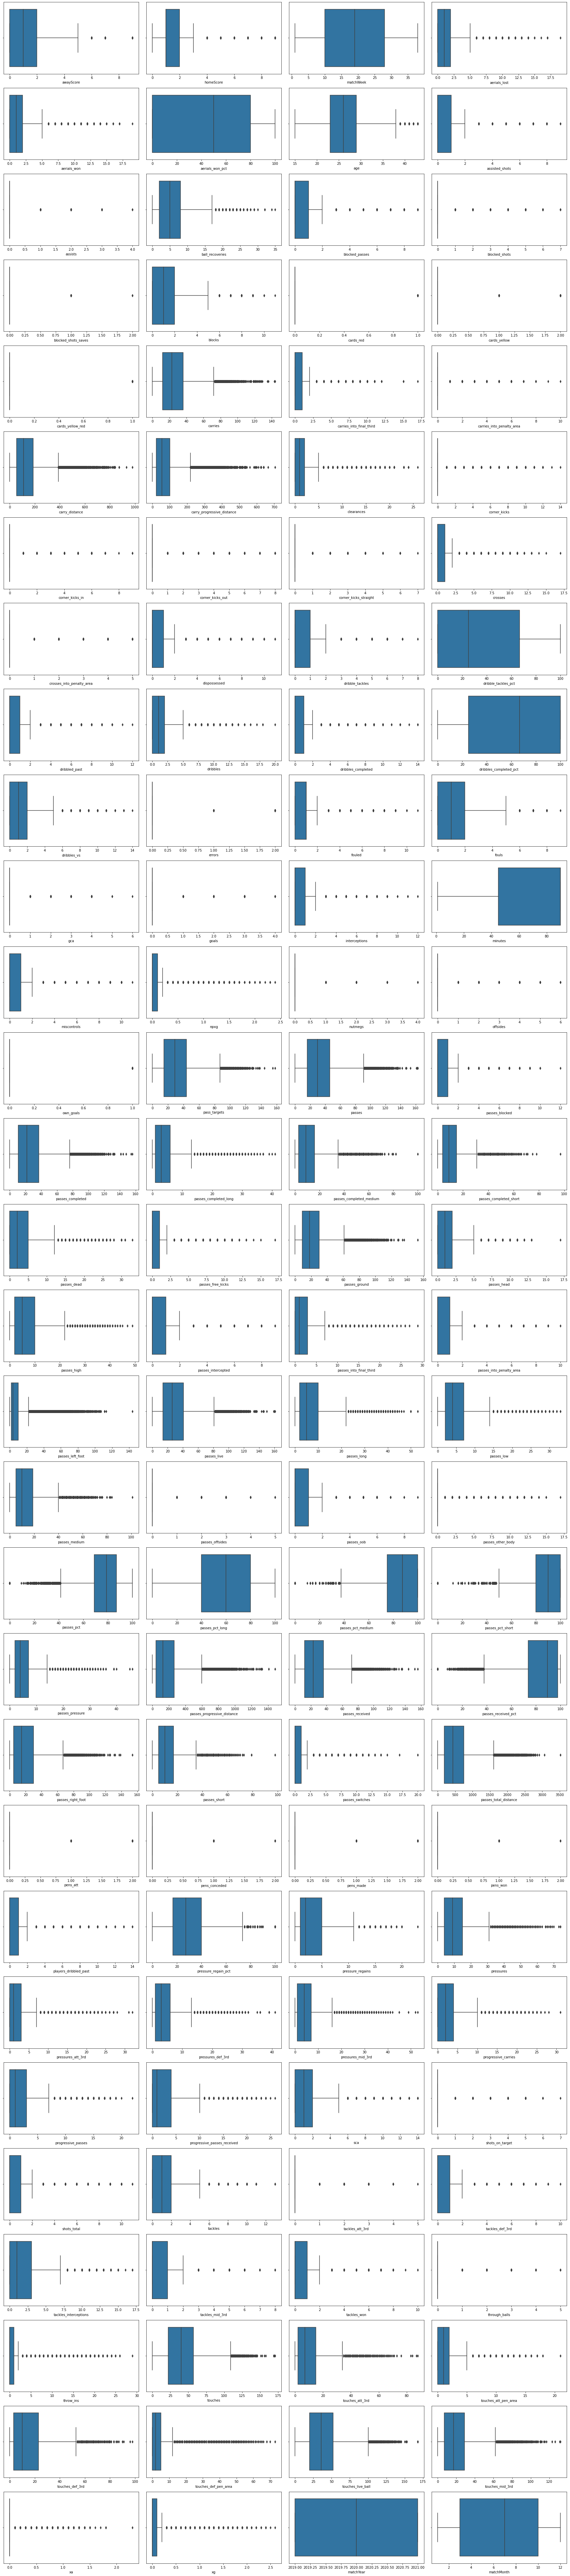

In [43]:
fig, axs = plt.subplots(30, 4, figsize = (24, 108))
axs = axs.flatten()


for i, col in enumerate(num_cols):
    sns.boxplot(data = df, x = col, ax=axs[i])

plt.tight_layout()
plt.show()

### Summary:
- 3 columns removed (id, player name and repeating team_name)
- categorical columns encoded
- many columns, some to be deleted in next step